## Importing Libraries

In [192]:
import pandas as pd
import numpy as np
import seaborn as sns
from ggplot import *
from collections import Counter
from scipy import stats

## Processing the Data

In [193]:
df2 = pd.read_csv("diabetes.csv")

In [194]:
df2.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Visualizing the Data

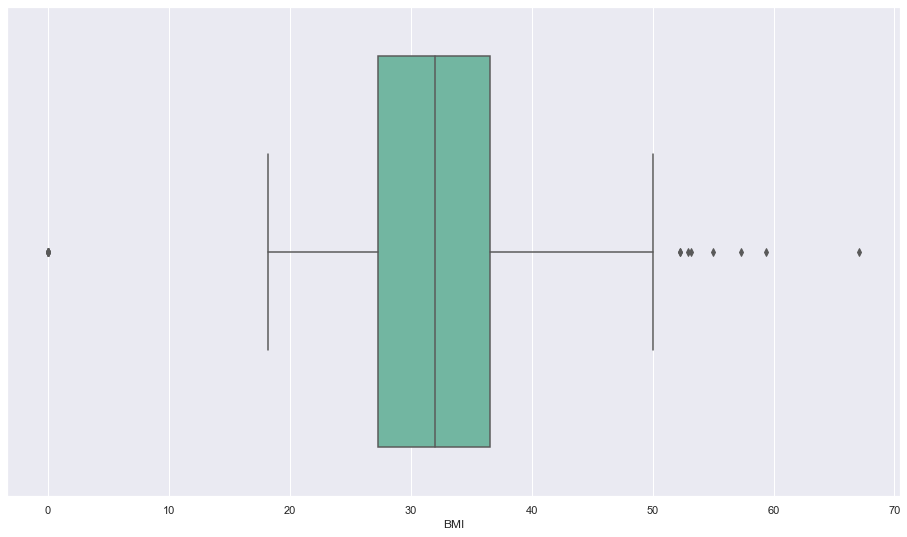

In [195]:
# Visualizing a Box Plot
sns.set(rc={'figure.figsize':(16,9)})
sns.boxplot(x = df2['BMI'], orient = "h", palette = "Set2")

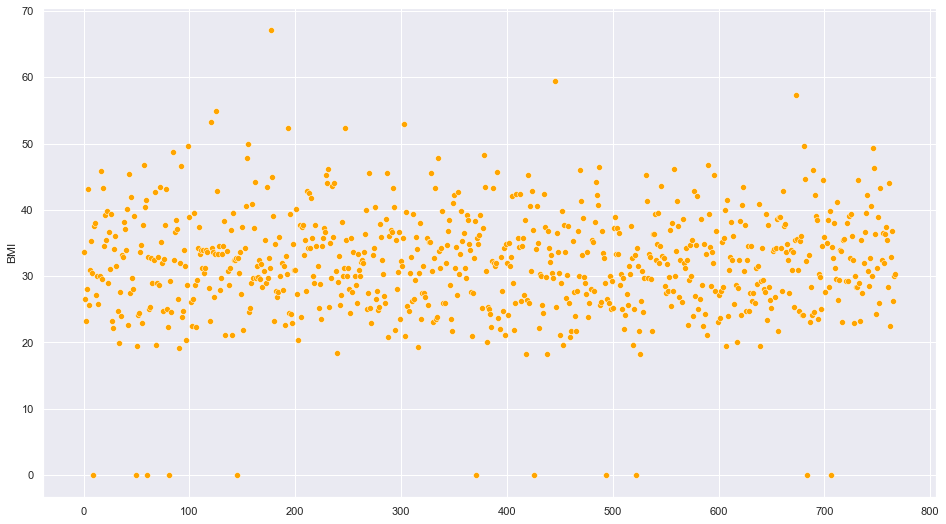

In [196]:
# Visualizing a Scatter Plot
sns.set(rc={'figure.figsize':(16,9)})
sns.scatterplot(data = df2['BMI'], color = 'orange')

## Tukey's Box-and-Whisker Plot (aka Box-Plot)

In [197]:
def detect_possible_outliers(dataset, column):
    # 1st Quartile 
    Q1 = np.percentile(dataset[column], 25)
    # 3st Quartile 
    Q3 = np.percentile(dataset[column], 75)
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    # Inner Fence, Lower & Upper End
    inner_fence = IQR * 1.5
    inner_lower = Q1 - inner_fence
    inner_upper = Q3 + inner_fence
    
    # Detect Possible Outliers and their Indices
    possible_outlier_list = dataset[(dataset[column] < inner_lower) | (dataset[column] > inner_upper)].index
    final = possible_outlier_list.tolist()
    return sorted(final)

In [198]:
num_possible_outlier = len(df2.loc[detect_possible_outliers(df2, "BMI")])
possible_outlier_indices = detect_possible_outliers(df2, "BMI")
print(f"Number of Possible Outliers detected --> {num_possible_outlier}")
print(f"Indices of Possible Outliers --> {possible_outlier_indices}")

Number of Possible Outliers detected --> 19
Indices of Possible Outliers --> [9, 49, 60, 81, 120, 125, 145, 177, 193, 247, 303, 371, 426, 445, 494, 522, 673, 684, 706]


In [199]:
def detect_probable_outliers(dataset, column):
    # 1st Quartile 
    Q1 = np.percentile(dataset[column], 25)
    # 3st Quartile 
    Q3 = np.percentile(dataset[column], 75)
    # Inter-Quartile Range (IQR)
    IQR = Q3 - Q1
    # Outer Fence, Lower & Upper End
    outer_fence = IQR * 3.0
    outer_lower = Q1 - outer_fence
    outer_upper = Q3 + outer_fence

    # Detect Probable Outliers and their Indices
    probable_outlier_list = dataset[(dataset[column] < outer_lower) | (dataset[column] > outer_upper)].index
    final = probable_outlier_list.tolist()
    return sorted(final)

In [200]:
num_probable_outlier = len(df2.loc[detect_probable_outliers(df2, "BMI")])
probable_outlier_indices = detect_probable_outliers(df2, "BMI")
print(f"Number of Probable Outliers detected --> {num_probable_outlier}")
print(f"Indices of Probable Outliers --> {probable_outlier_indices}")

Number of Probable Outliers detected --> 1
Indices of Probable Outliers --> [177]


## Z-Score (aka Internally Studentized Residuals)

In [201]:
# Z-Score (aka Internally Studentized Residuals)

def z_score_method(dataset, column):
    outlier_list = []
    # Standard Deviation Threshold 
    threshold_97 = 3 # Default
    threshold_99 = 3.29 # More Conservative
    #Compute the Z-Score of each row in the Column - An Array
    z = np.abs(stats.zscore(dataset[column]))
    
    # Detect Outliers and their Indices
    for index, score in enumerate(z):
        if abs(score) > threshold_97: # Change if needed
            outlier_list.append(index)
        else: 
            continue
    return outlier_list

In [202]:
num_outlier = len(z_score_method(df2, "BMI"))
outlier_indices = z_score_method(df2, "BMI")
print(f"Number of Outliers detected --> {num_outlier}")
print(f"Indices of Outliers --> {outlier_indices}")

Number of Outliers detected --> 14
Indices of Outliers --> [9, 49, 60, 81, 145, 177, 371, 426, 445, 494, 522, 673, 684, 706]


## Robust Z-Score (aka Median Absolute Deviation Method)

In [203]:
# Robust Z-Score (aka Median Absolute Deviation Method)

def robust_z_score_method(dataset, column):
    outlier_list = []
    # Standard Deviation Threshold 
    threshold_97 = 3  # Default
    threshold_99 = 3.29 # More Conservative
    # Calculate Median Value
    median = np.median(dataset[column])
    # Calculate Median Absolute Deviation - A Single Value
    mad = np.abs(stats.median_absolute_deviation(dataset[column]))
    
    # Detect Outliers and their Indices
    for index, score in enumerate(dataset[column].tolist()):
        # Calculate Robust Z Score 
        robust_z_score = abs((score - median) / mad)
        if robust_z_score > threshold_97: # Change if needed
            outlier_list.append(index)
        else: 
            continue
    return outlier_list

In [204]:
num_robust_outlier = len(robust_z_score_method(df2, "BMI"))
robust_outlier_indices = robust_z_score_method(df2, "BMI")
print(f"Number of Robust Outliers detected --> {num_robust_outlier}")
print(f"Indices of Robust Outliers --> {robust_outlier_indices}")

Number of Robust Outliers detected --> 17
Indices of Robust Outliers --> [9, 49, 60, 81, 120, 125, 145, 177, 303, 371, 426, 445, 494, 522, 673, 684, 706]
